# Instructions

Please follow all tutorial instructions for displaying text and images. If we ask for an image, please make sure it is labeled. If we ask for text, **clearly label it and include units**. For example, if the question asks for you to "**Print the V-band magnitude of the standard star**," a quantity you have computed, your output might look like the following:

In [1]:
V_band_magnitude = 12.43  # computed elsewhere
print(f'V-band magnitude of standard star: {V_band_magnitude} magnitudes.')

V-band magnitude of standard star: 12.43 magnitudes.


For displaying images, it is straight-forward with matplotlib using `plt.imshow(array)`. A few keywords you will find useful are `vmin` and `vmax` which set the image scaling (minimum and maximum value). You can also use the normalizations available from the library `matplotlib.colors`. Please also always use the keyword `origin='lower'`, which sets pixel (0,0) in the lower left corner. An example might look like this: 

`plt.imshow(array, vmin=200, vmax=8000, origin='lower')`

**Bold** text indicates the output we expect to see for a question. You can use as many cells as you think are necessary for a question, but please do not remove any of the sections or instruction text. Please make sure your methodology is clear, either through comments in the code and/or explicit variable and function names.

> **IMPORTANT!**<br>
> Once you have finished the problem set, reset the kernel and run all of the cells from top to bottom to ensure it works as you expect. We should be able to replicate your results on our own computers by only changing the path to the location of the data files.

# Package Imports

Import the packages you need. The primary packages you will need are `matplotlib`, `numpy` and `astropy.io.fits`. Please **do not use additional packages** without first checking with the instructors. It's likely we will give you permission if the scope of your intended use does not override the learning goals of this tutorial. 

If you are familiar with (and want to use) `astropy.units` and `astropy.constants`, it may help you keep track of units along the way. Please see the TA if you'd like help implementing its use.

In [2]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.units as u
import astropy.constants as c
from astropy.table import Table
import numpy as np
from matplotlib import colors
import glob

# Part I: Orienting Yourself to the Dataset

1. **Print out a list of available data files (the file extension is `.fits`).**

In [3]:
files = glob.glob("./problemset2data/*.fits")
files

['./problemset2data/lris0175.fits',
 './problemset2data/lris0152.fits',
 './problemset2data/lris0173.fits',
 './problemset2data/lris0137.fits',
 './problemset2data/lris0156.fits',
 './problemset2data/lris0167.fits',
 './problemset2data/lris0139.fits',
 './problemset2data/lris0157.fits',
 './problemset2data/lris0178.fits',
 './problemset2data/lris0153.fits',
 './problemset2data/lris0172.fits',
 './problemset2data/lris0181.fits',
 './problemset2data/lris0155.fits',
 './problemset2data/lris0174.fits',
 './problemset2data/lris0160.fits',
 './problemset2data/lris0158.fits',
 './problemset2data/lris0140.fits',
 './problemset2data/lris0176.fits',
 './problemset2data/lris0162.fits',
 './problemset2data/lris0179.fits',
 './problemset2data/lris0136.fits',
 './problemset2data/lris0159.fits',
 './problemset2data/lris0182.fits',
 './problemset2data/lris0154.fits',
 './problemset2data/lris0147.fits',
 './problemset2data/lris0180.fits',
 './problemset2data/lris0177.fits',
 './problemset2data/lris0148

2. Choose one file and explore the fits header keywords and think about what they all represent. Click [here](https://docs.astropy.org/en/stable/io/fits/index.html) to access Astropy's documentation for working with FITS files. You can print an easier-to-read header if you use `print(repr(header))` rather than just `print(header)`. **Print the header with keywords and their values.**

In [4]:
chosen_file = files[0]
open_file = fits.open(chosen_file)
header_file = open_file[0].header
print(repr(header_file))
header_file["OBJECT"]

SIMPLE  =                    T / file conforms to FITS standard?                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2250 / length of data axis   1                        
NAXIS2  =                 2048 / length of data axis   2                        
TRAPDOOR= 'open    '           /                                                
SLITNAME= 'direct  '           /                                                
SLITMASK=                    1 /                                                
GRANAME = 'mirror  '           /                                                
GRATING =                    1 /                                                
GRANGLE =          13.47150421 /                                                
REDFILT = 'I       '           /                                                
REDFNUM =                   

'domeflat I'

3. Construct an observation log. For each file you found above, the table should include:<br><br>
&nbsp; &nbsp; &nbsp; &nbsp; 1\. The file name,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 2\. The UT time,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 3\. The target right ascension,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 4\. The target declination,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 5\. The target name,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 6\. The object name,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 7\. The airmass,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 8\. The filter, and<br>
&nbsp; &nbsp; &nbsp; &nbsp; 9\. The exposure time.<br><br>
Make sure your table has a title on every column, including units when relevant. **Print out an in-line log table.**

> **NOTE**<br>
> The target name is added automatically to the FITS header by the instrument, but the object name is added manually by the observer (who probably forgot to change it for some of the observations!) It's useful to look at both because they may contain slightly different information, and if they disagree for a given file you need to figure out why and which is correct (there are many reasons why one or the other may be incorrect). For example, when you've constructed your table, compare the listed filters for the dome flats to the filters in the object name.

In [13]:
Obslog = Table(
                    names=("File", "UTC", "ra", "dec", "targetid", "objid", "airmass", "filter", "exptime"
                    ),
                    meta={"name": "Observation Log"},
                    dtype=("U64", "U64", "U64", "U64", "U64", "U64", "float64", "U64", "float64"
                          )
                    )
for i in files:
      open_file = fits.open(i)
      header_file = open_file[0].header
      row = [i, header_file["UT"], header_file["RA"],
             header_file["DEC"], header_file["TARGNAME"], header_file["OBJECT"], 
             header_file["AIRMASS"], header_file["REDFILT"], header_file["EXPOSURE"]]
      Obslog.add_row(row)

In [14]:
Obslog

File,UTC,ra,dec,targetid,objid,airmass,filter,exptime
str64,str64,str64,str64,str64,str64,float64,str64,float64
./problemset2data/lris0175.fits,15:10:54.05,04:29:24.00,+48:00:00.0,HORIZON STOW,domeflat I,1.34462799,I,4.0
./problemset2data/lris0152.fits,12:39:26.08,20:36:50.00,+42:26:58.0,W75N,W75N (for jmc),1.08833669,I,300.0
./problemset2data/lris0173.fits,15:07:53.03,04:29:24.00,+48:00:00.0,HORIZON STOW,domeflat I,1.34462799,I,4.0
./problemset2data/lris0137.fits,11:20:37.41,18:58:31.70,-37:01:30.0,rcra,rcra,1.81941515,R,3.0
./problemset2data/lris0156.fits,12:58:14.33,20:18:42.50,+41:12:20.0,bdp40,bd+404124,1.0759376,R,3.0
./problemset2data/lris0167.fits,14:12:26.44,23:29:34.02,-23:55:53.8,grb981226,grb981226 (for srk etal),1.55889272,R,900.0
./problemset2data/lris0139.fits,11:28:46.28,18:58:31.70,-37:01:30.0,rcra,rcra,1.81880172,I,30.0
./problemset2data/lris0157.fits,13:00:33.73,21:41:57.60,+65:53:07.1,ngc7129,ngc7129,1.47732793,R,3.0
./problemset2data/lris0178.fits,15:17:37.85,04:29:24.00,+48:00:00.0,HORIZON STOW,domeflat R,1.34462799,R,10.0


4. The files in this set include flats and science frames. Familiarize yourself with what raw data looks like. **Display the data in one of the science frames. Title it with the name of the object from the FITS header.**

> **NOTE**<br>
> When reading in data from a FITS file, always make sure to convert the data type to floating-point numbers. If you don't, math you perform on the images later in the notebook may produce strange results. If you've opened your FITS file with `astropy.io.fits` and stored it in a variable called `hdul`, you want to store the data from the primary extension in a variable called `data`, you might do it like this:
> `data = hdul['PRIMARY'].data.astype(float)`

Text(0.5, 1.0, 'W75N (for jmc)')

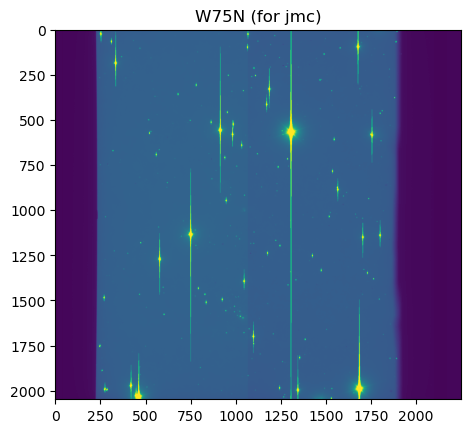

In [15]:
chosen_file = files[1]
open_file = fits.open(chosen_file)
header_file = open_file[0].header
data = open_file['PRIMARY'].data.astype(float)
plt.imshow(data)
plt.title(header_file["OBJECT"])

# Part II: Data Reduction

5. Open one of the flat files and display the data. **Display one of the flats. Title the figure with "Flat" and the filter name.** Make sure you understand the various aspects of the image and why it looks the way it does.

Text(0.5, 1.0, 'ngc7129')

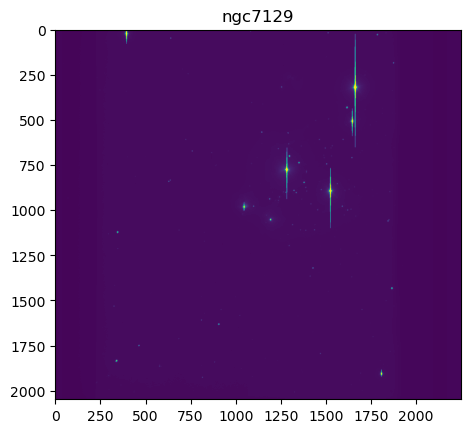

In [16]:
dome_flat = files[-1]
dome_file = fits.open(dome_flat)
header_dome_file = dome_file[0].header
dome_data = dome_file['PRIMARY'].data.astype(float)
plt.imshow(dome_data)
plt.title(header_dome_file["OBJECT"])

6. Identify the column indices that mark the boundaries of the two halves of the CCD (with different amplifiers). **Print out the indices corresponding to the edges of the left and right detectors. Display any plots you used to verify your results.**

(array([], dtype=int64),)
[232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426

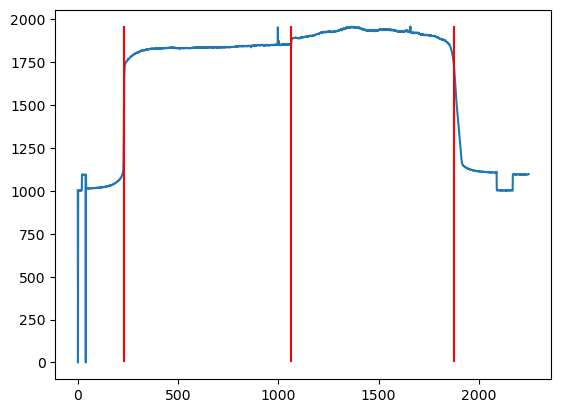

In [17]:
row = np.median(dome_data, axis = 0)
plt.plot(row)
print(np.where((row < 35000) & (row > 20000)))
min_y = np.min(row)
max_y = np.max(row)
min_x = 230
max_x = 1875
plt.vlines(min_x, min_y, max_y, color = "Red")
plt.vlines(max_x, min_y, max_y, color = "Red")
left = np.mean(row[500:1000])
right = np.mean(row[1200:1700])
delta = left - right
large_delta = []
for i in range(min_x, max_x):
    diff = row[i]-row[i+1]
    if(diff > delta):
        large_delta.append(i)
print(large_delta)
middle = 1065
plt.vlines(middle, min_y, max_y, color = "Red")
#plt.yscale("log")


7. Identify the indices of the columns that contain the two overscan regions for each detector half. This is most easily done by displaying a median along the vertical axis. The overscan regions are the two stripes down the right side between roughly columns 2100 and 2250. The left overscan region has the combined bias and dark level for the left side of the detector, and the right overscan region has the combined bias and dark level for the right side of the detector. **Print out the indices corresponding to the edges of the overscan regions for the left and right detectors. Display any plots you used to verify your results.**

[39]
[119]


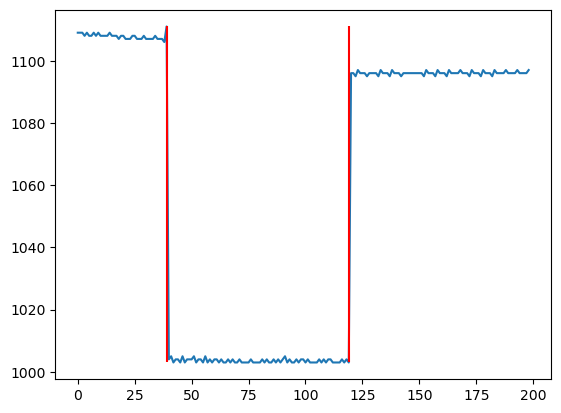

In [18]:
start = 2050
row_overscan = row[start:-1]
plt.plot(row_overscan)
right_ccd = np.median(row_overscan[0:25])
overscan_region_1 = np.median(row_overscan[50:110])
overscan_region_2 = np.median(row_overscan[125:-1])
delta_1 = right_ccd-overscan_region_1
delta_1_i = []
delta_2 = overscan_region_1-overscan_region_2
delta_2_i = []
for i in range(len(row_overscan) - 1):
    diff = row_overscan[i] - row_overscan[i + 1]
    if(diff > delta_1):
        delta_1_i.append(i)
    if(diff < delta_2/2 and i > 50):
        delta_2_i.append(i)
print(delta_1_i)
print(delta_2_i)
left_1 = 39
right_1 = 119
min_y = np.min(row_overscan)
max_y = np.max(row_overscan)
plt.vlines(left_1, min_y, max_y, color = "Red")
plt.vlines(right_1, min_y, max_y, color = "Red")
overscan_region_left_1 = left_1 + start
overscan_region_left_2 = right_1 + start


## Master Flats

8. Create a clean, normalized  "master flat" for each filter. For each individual flat image:<br><br>
&nbsp; &nbsp; &nbsp; &nbsp; 1\. Subtract the combined bias and dark level using the overscan regions,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 2\. Crop out the un-illuminated region of the detector (trim the image down to just the two detectors),<br>
&nbsp; &nbsp; &nbsp; &nbsp; 3\. Median-combine all flat images (for the same filter), and<br>
&nbsp; &nbsp; &nbsp; &nbsp; 4\. Normalize the result (you can either normalize by the maximum value, the average value, or the median value).<br><br>

> **NOTE**<br>
> Make sure that all the flats you're using to make the master have the same exposure time! If they do not, you can divide by the exposure time before combining them. Also make sure you have viewed every image you're using and that they look as you expect. Log files and FITS headers are subject to human error and are often incorrect! For each flat, check that 
> 1. All flats taken with a given filter have roughly the same counts, 
> 2. Those counts are much higher than the bias level, and
> 3. There are no astronomical sources in the field.

## R-Band Filter

(a) **Display your final normalized master flat for the first filter, including a colorbar. Title the plot with "Master Flat" and the filter name.**

In [85]:
rflats = Obslog[np.where((Obslog["filter"] == "R") & (Obslog["targetid"] == "HORIZON STOW"))]
data_read = []
for i in rflats:
    data_one = fits.open(str(i["File"]))['PRIMARY'].data.astype(float)
    data_proc = []
    for j in range(len(data_one)):
        row = data_one[j]
        overscan_ccd_1 = np.median(row[overscan_region_left_1:overscan_region_left_2])
        overscan_ccd_2 = np.median(row[overscan_region_left_2: -1])
        ccd_1 = row[min_x:middle] - overscan_ccd_1
        ccd_2 = row[middle:max_x] - overscan_ccd_2
        data_proc.append((np.append(ccd_1,ccd_2))/i["exptime"])
    data_proc = np.asarray(data_proc)
    data_read.append(data_proc)
data_read = np.array(data_read)
final_flat = np.median(data_read, axis = 0)
final_flat_r = final_flat/np.median(final_flat)

1.422850464198293

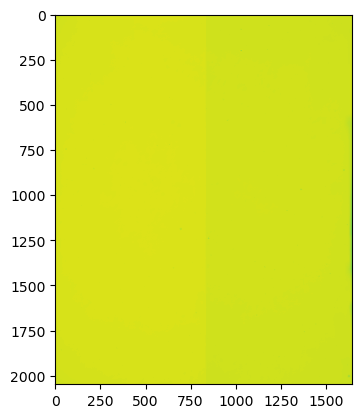

In [86]:
plt.imshow(final_flat_r,norm=colors.LogNorm())
np.max(final_flat_r)

## I-Band Filter

(b) Repeat the procedure above for the I-band filter. (You can copy and paste your code, changing just the filter-specific components). **Display your final normalized master flat for the second filter, including a colorbar. Title the plot with "Master Flat" and the filter name.**

1.3859457038345733

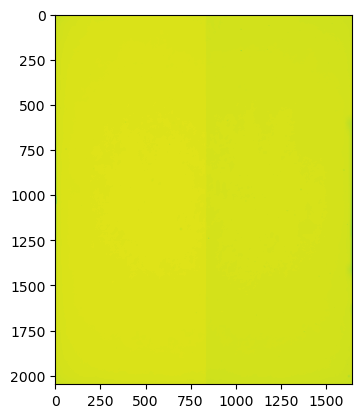

In [84]:
rflats = Obslog[np.where((Obslog["filter"] == "I") & (Obslog["targetid"] == "HORIZON STOW"))]
data_read = []
for i in rflats:
    data_one = fits.open(str(i["File"]))['PRIMARY'].data.astype(float)
    data_proc = []
    for j in range(len(data_one)):
        row = data_one[j]
        overscan_ccd_1 = np.median(row[overscan_region_left_1:overscan_region_left_2])
        overscan_ccd_2 = np.median(row[overscan_region_left_2: -1])
        ccd_1 = row[min_x:middle] - overscan_ccd_1
        ccd_2 = row[middle:max_x] - overscan_ccd_2
        data_proc.append((np.append(ccd_1,ccd_2))/i["exptime"])
    data_proc = np.asarray(data_proc)
    data_read.append(data_proc)
data_read = np.array(data_read)
final_flat = np.median(data_read, axis = 0)
final_flat_i = final_flat/np.median(final_flat)
plt.imshow(final_flat_i,norm=colors.LogNorm())
np.max(final_flat_i)

# Part III: Photometric Calibration

9. Display the data for one of the exposures of star SA 110-361 (also listed as TYC 447-508-1 on Simbad). Remove the overscan region and flat the data. **Display the data at three stages of reduction so you can see how it changes as each is applied.**

> **NOTE**<br>
> This star has different designations in different catalogs. SA means "Selected Area". TYC is the "Tycho Reference Catalogue".

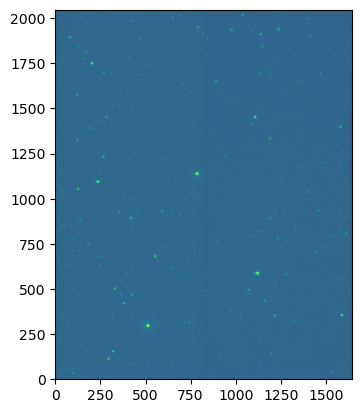

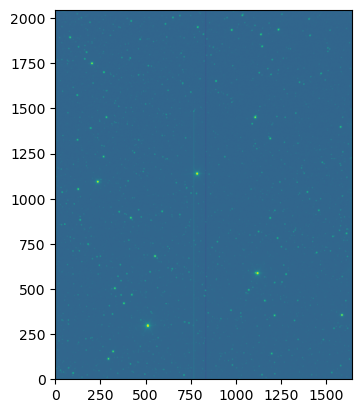

In [87]:
Obslog_r = Obslog[np.where((Obslog["targetid"] == "110 361") & (Obslog["filter"] == "R"))][0]
SA110361_r = fits.open(Obslog_r["File"])['PRIMARY'].data.astype(float)
SA110361_r_norm = []
for j in range(len(SA110361_r)):
    row = SA110361_r[j]
    overscan_ccd_1 = np.median(row[overscan_region_left_1:overscan_region_left_2])
    overscan_ccd_2 = np.median(row[overscan_region_left_2: -1])
    ccd_1 = row[min_x:middle] - overscan_ccd_1
    ccd_2 = row[middle:max_x] - overscan_ccd_2
    SA110361_r_norm.append((np.append(ccd_1,ccd_2))/i["exptime"])
plt.imshow(SA110361_r_norm,norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.show()
SA110361_r_norm = np.asarray(SA110361_r_norm)
SA110361_r_norm_flat = SA110361_r_norm / final_flat_r
plt.imshow(SA110361_r_norm_flat,norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.show()


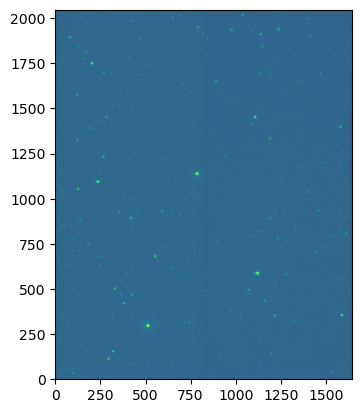

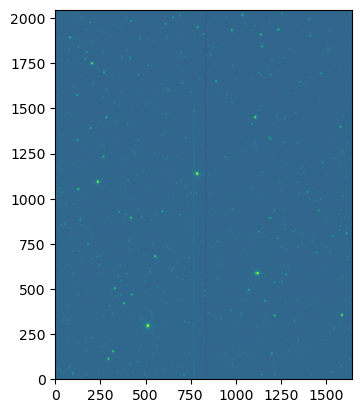

In [88]:
Obslog_i = Obslog[np.where((Obslog["targetid"] == "110 361") & (Obslog["filter"] == "I"))][0]
SA110361_i = fits.open(Obslog_r["File"])['PRIMARY'].data.astype(float)
SA110361_i_norm = []
for j in range(len(SA110361_i)):
    row = SA110361_i[j]
    overscan_ccd_1 = np.median(row[overscan_region_left_1:overscan_region_left_2])
    overscan_ccd_2 = np.median(row[overscan_region_left_2: -1])
    ccd_1 = row[min_x:middle] - overscan_ccd_1
    ccd_2 = row[middle:max_x] - overscan_ccd_2
    SA110361_i_norm.append((np.append(ccd_1,ccd_2))/i["exptime"])
plt.imshow(SA110361_i_norm,norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.show()
SA110361_i_norm = np.asarray(SA110361_i_norm)
SA110361_i_norm_flat = SA110361_i_norm / final_flat_i
plt.imshow(SA110361_i_norm_flat,norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.show()


10. Find the star on [Simbad](http://simbad.cds.unistra.fr) (you may have to search using its TYC designation). Use the chart to identify which star is SD 110-361 in your calibration image. Identify a second star and use the angular separation between SD 110-361 and the second star to determine the plate scale of the detector. **Print out the pixel scale in units of arcsec/pixel and the detector dimensions in arcminutes.**

492 315


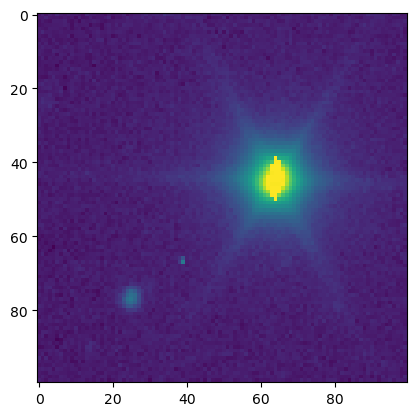

In [103]:
GSC_x = 450
GSC_y = 250
window = 100
GSC = SA110361_r_norm_flat[GSC_y:GSC_y+window][:,GSC_x:GSC_x+window]
plt.imshow(GSC,norm=colors.LogNorm())
max_where = np.where(np.max(GSC) == GSC)
GSC_x_max = GSC_x + max_where[0][0]
GSC_y_max = GSC_y + max_where[1][0]
print(GSC_x_max,GSC_y_max)

787 1137


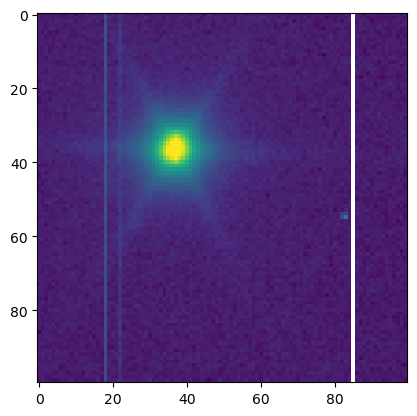

In [104]:
TYC_x = 750
TYC_y = 1100
window = 100
TYC = SA110361_r_norm_flat[TYC_y:TYC_y+window][:,TYC_x:TYC_x+window]
plt.imshow(TYC,norm=colors.LogNorm())
max_where = np.where(np.max(TYC) == TYC)
TYC_x_max = TYC_x + max_where[0][0]
TYC_y_max = TYC_y + max_where[1][0]
print(TYC_x_max,TYC_y_max)

In [101]:
arcsec_sep = 187.03
pixel_dist = np.sqrt(np.power(GSC_x_max-TYC_x_max, 2) + np.power(GSC_y_max-TYC_y_max, 2))
arcsec_pixel = arcsec_sep/pixel_dist
arcsec_pixel

0.2106908547480379

In [102]:
#GSC 00447-00479 520, 250 	280.70330654488 +00.08513590107
#TYC 447-508-1 800, 1100

(np.array(SA110361_r_norm_flat.shape) * arcsec_pixel)/60

array([7.19158118, 5.77644093])

11. For the flux calibration of the images, we will be using standard star SA 110-361. Get the star's V-band, R-band and I-band magnitude from [this](https://www.eso.org/sci/observing/tools/standards/Landolt.html) table. Then, express the magnitudes in flux densities with units of $\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}}$. Use the following zero-magnitude flux densities:<br><br>
$F_\mathrm{0,R} = 1.738\times 10^{-8}\,\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}}$<br>
$F_\mathrm{0,I} = 8.318\times 10^{-9}\,\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}}$<br>
You can solve for these using the definition of magnitudes:<br>
$m = -2.5\log_{10}\left(\frac{F}{F_0}\right)$<br>
**Print out the calibrated flux density of the star under the two filter bands.**

In [93]:
V = 12.43
VR = 0.361
VI = 0.709
R = V - VR
I = V - VI

IF0 = 8.318 * 10**-9
RF0 = 1.738 * 10**-8

IF = 10**(I/(-2.5)) * IF0
RF = 10**(R/(-2.5)) * RF0
print(IF)
print(RF)

1.7045859954006894e-13
2.5849358641408734e-13


12. Use aperture photometry to determine the brightness of the star in both filters in units of counts/s. This will enable you to derive a conversion factor between counts/ and physical flux density that you can apply to your scientific targets.

[37, 37]
787 1137


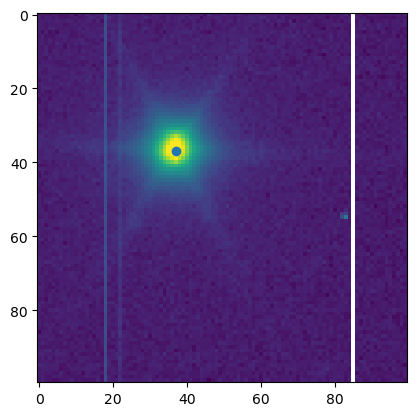

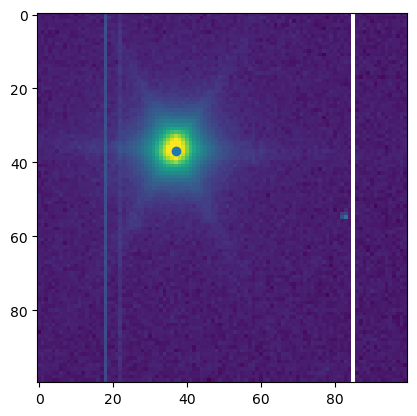

In [94]:
TYC_x = 750
TYC_y = 1100
window = 100
TYC_r = SA110361_r_norm_flat[TYC_y:TYC_y+window][:,TYC_x:TYC_x+window]
TYC_i = SA110361_i_norm_flat[TYC_y:TYC_y+window][:,TYC_x:TYC_x+window]
max_where_r = np.where(np.max(TYC_r) == TYC_r)
TYC_center_r = [max_where_r[1][0],max_where_r[0][0]]
max_where_i = np.where(np.max(TYC_i) == TYC_i)
TYC_center_i = [max_where_i[1][0],max_where_i[0][0]]
plt.scatter(TYC_center_r[0], TYC_center_r[1])
plt.imshow(TYC_r,norm=colors.LogNorm())
print(TYC_center_r)
print(TYC_center_r[0] + TYC_x, TYC_center_r[1] + TYC_y)

#for i in range(-3,4):
#    for j in range(-3,4):
#        if(np.absolute(i) + np.absolute(j) < 5):
#            plt.scatter(TYC_center_r[0] + i, TYC_center_r[1] + j)
plt.show()

plt.scatter(max_where_i[1][0],max_where_i[0][0])
plt.imshow(TYC_i,norm=colors.LogNorm())
#for i in range(-3,4):
#    for j in range(-3,4):
#        if(np.absolute(i) + np.absolute(j) < 5):
#            plt.scatter(TYC_center_i[0] + i, TYC_center_i[1] + j)
plt.show()

## R-Band Filter

(a) Reduce the SD 110-361 the science data for the R-band filter. **Print out the pixel coordinates of the center of the standard star SD 110-361. Display the data and show the position on the detector image.**

[787, 1137]


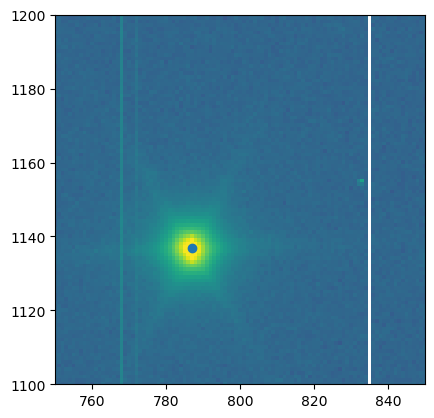

In [105]:
TYC_x = 750
TYC_y = 1100
window = 100
TYC_r = SA110361_r_norm_flat[TYC_y:TYC_y+window][:,TYC_x:TYC_x+window]
max_where_r = np.where(np.max(TYC_r) == TYC_r)
TYC_center_r = [TYC_x + max_where_r[1][0],TYC_y + max_where_r[0][0]]
print(TYC_center_r)
plt.imshow(SA110361_i_norm_flat,norm=colors.LogNorm())
plt.scatter(TYC_center_r[0],TYC_center_r[1])
plt.xlim(TYC_x, TYC_x + window)
plt.ylim(TYC_y, TYC_y + window)
#plt.gca().invert_yaxis()
plt.show()


(b) Perform aperture photometry on the standard star to determine its brightness in units of counts/s. You'll want to plot counts/s vs. inner radius to show where the curve levels off to justify the radius value you've chosen. You'll want to do the same for the median of the background for the same justification reasons. **Display both plots and print out the R-band flux calibration in units of $(\mathbf{W}\,\mathbf{m^{-2}}\,\mathbf{µ m^{-1}})/(\mathbf{counts}\,\mathbf{s^{-1}})$.**

> **CAUTION**<br>
> When choosing your three radii for aperture photometry, first explore the outer two radii, making sure the chosen background annulus does not contain significant flux from the star. Make sure to divide your data by the exposure time in the header to convert your data to counts/s.

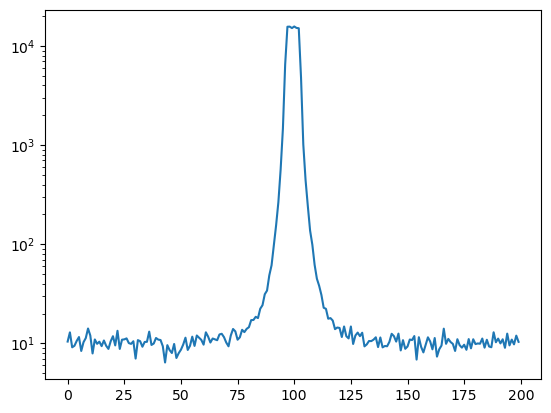

In [106]:
vert_r = SA110361_r_norm_flat[TYC_center_r[1] - 100:TYC_center_r[1] + 100][:,TYC_center_r[0]]
ap_r = 20
inner_r = 25
outer_r = 100

ap_total = 0
ap_n_pixel = 0
sky_total = 0
sky_n_pixel = 0

for i in range(-outer_r, outer_r + 1):
    for j in range(-outer_r, outer_r + 1):
        r = np.absolute(i)+np.absolute(j)
        if (r > inner_r and r < outer_r):
            sky_n_pixel += 1
            sky_total += SA110361_r_norm_flat[TYC_center_r[1] + i][TYC_center_r[0] + j]
        else (r < ap_r):

plt.plot(vert_r)
plt.yscale("log")

## I-Band Filter

(c) Repeat for the I-band filter. Note that the standard star may not be at the exact same location between filters. **Print out the pixel coordinates of the center of the standard star SD 110-361. Display the data and show the position on the detector image.**

(d) Perform the same aperture photometry, but now with the I-band filter. **Display both plots and print out the R-band flux calibration in units of $[(\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}})/(\mathrm{counts}\,\mathrm{s^{-1}})]$.**

# Part IV: Scientific Data Analysis

We will be using the science data for the reflection nebula NGC 7129. Start by displaying a couple of the images to see how they differ. The images have different exposure times, so converting your data to flux by dividing by the exposure time will make the frames comparable. You will need to make sure the stars you are using for this part are not saturated. Using the shorter exposure time images will allow you to measure brighter stars, while the longer exposure times will allow you to measure the fainter stars.

To orient yourself to the field, find a picture of star-forming region NGC 7219 online (for example, [here](https://noirlab.edu/public/images/noao-ngc7129/).) Orient yourself to which part of the nebula your data is of. You may want to look at the header keywords:
`ROTMODE` is the "position angle" and means rotation angle of the image east of north. `ROTPPOSN` is the value of the rotation angle.

13. **Display the data for each of the filters and each of the exposure times. Title the plot with the filter name.**

14. Choose 5 stars within the image. Find the center coordinates for each of the stars you've selected. **Show their position on the science image you selected for the R-band filter.**

For each star you've chosen, display plots of counts/s vs. aperture radius in pixels.

## R-Band Filter

(a) Choose a justifiable radius for each star, then calculate its brightness in counts/s and calibrate it with your R-band calibration factor. **Display plots of the aperture sums and median background vs. inner radius and print out the calibrated flux density.**

## I-Band Filter

(b) Repeat for the I-band filter. **Display plots of the aperture sums and median background vs. inner radius and print out the calibrated flux density.**

16. **Display a plot containing the flux density of each star under the two filters. Scatter plot the calibrated flux density against the filter wavelength. Each star should be labeled, the plot should have a legend (or other indication of which point is which star), and the axes should have units and labels.**

You may have to look up the central wavelengths of the two filters. [This](https://en.wikipedia.org/wiki/Photometric_system) Wikipedia page may be useful.

17. **Create a color-magnitude diagram of your chosen stars, with color (the difference in magnitudes between the two filters) on the horizontal axis and the magnitude in one of the filters on the vertical axis.** Based on your plot, can you determine which of your chosen stars belong to the cluster?

18. How much time did you spent working on this problem set (including time spent in office hours)?

These data are published in [Dahm and Hillenbrand (2015)](https://iopscience.iop.org/article/10.1088/0004-6256/149/6/200/pdf). You can find the full color-magnitude diagram (including many more sources than your analysis) in figure 3.